<a href="https://colab.research.google.com/github/lmksoehd/ABC_boot_camp/blob/main/Iris_task01(8%EC%9B%9413%EC%9D%BC_%EC%A3%BC%EC%84%9D%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 필요한 import / 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')

## 문제 정의하기


*  다중분류예제에적합한데이터셋은4개변수(꽃받침길이, 꽃받침너비, 꽃잎길이, 꽃잎너비)
- 5번째는아이리스품종3가지(Iris Setosa, Iris Versicolour, Iris Virginica) 아이리스데이터셋

*   데이터셋총수150 (각품종별50개데이터)

*  4개변수(각꽃의길이너비등)를 독립변수로 보고 아이리스 품종을 분류하는 다중 분류 문제로 정의





## 데이터 불러오기/ 컬럼 설정

In [ ]:
# 데이터 불러오기
dataset_path = tf.keras.utils.get_file('iris.data', 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
column_names = ['꽃받침길이', '꽃받침너비', '꽃잎길이', '꽃잎너비', '종']

In [ ]:
raw_dataset = pd.read_csv(dataset_path, names=column_names)

dataset = raw_dataset.copy()

In [ ]:
dataset

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비,종
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## 전처리

In [ ]:
# 데이터셋의 feature와 target으로 분리
x = dataset.iloc[:, 0:4].values  # 입력 속성값 4개를 x로
y = pd.get_dummies(dataset['종']).values  #판정 결과 1개를 y로 설정


# 학습, 검증, 테스트 셋 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  #8:2 비율로 나누는 작업
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42) # 추가: 검증 데이터셋 추출

### 정기야 봐봐

이 부분의 코드는 데이터셋에서 특징 변수(꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비)와 타겟 변수(붓꽃 종류)를 분리하는 과정이잖아?
일단 X는 feature지. 데이터프레임 dataset에서 첫 번째 열부터 네 번째 열까지의 값을 선택하고.values를 통해서 넘파이 배열로 변환할거야.
그리고 .lioc[]는 행or열의 번호를 기준으로 특정 영역을 인덱싱 하는거얌 : 이 콜론을 사용해서 범위를 설정하게 되어잇엉

y는 타겟 변수지. 나는 dataset에서 ['종']이라는 열을 선택해서 원핫 인코딩 사용, 분류 문제로 해결할 수 있는 형태로 변환 -> .values 넘파이 배열 변환/
pd.get_dummies(): 주어진 df의 지정열을 원핫 인코딩 형태로 변환.
이건 범주형 데이터라서 컴퓨터가 이해할 수 있는 형태로 바꾸기 위함.
여기서 붓꽃 종류를 나타내는 '종' 열을 원핫 한것.

이제 feature X와 target y는 각각 넘파이 배열로 저장, 이후 모델 학습에 사용


In [ ]:
# 모델 구성
model = tf.keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(4,)),
    layers.Dense(3, activation='softmax')
])

In [ ]:
# 학습 과정 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# 모델 학습
history = model.fit(x_train, y_train, epochs=200, batch_size=10,
                    validation_data=(x_val, y_val)) # 추가: 검증 데이터 설정

Epoch 1/200
9/9 [==============================] - 1s 38ms/step - loss: 2.7330 - accuracy: 0.3444 - val_loss: 2.4522 - val_accuracy: 0.3000
Epoch 2/200
9/9 [==============================] - 0s 8ms/step - loss: 2.3644 - accuracy: 0.3444 - val_loss: 2.0960 - val_accuracy: 0.3000
Epoch 3/200
9/9 [==============================] - 0s 7ms/step - loss: 2.0179 - accuracy: 0.3444 - val_loss: 1.8159 - val_accuracy: 0.3000
Epoch 4/200
9/9 [==============================] - 0s 9ms/step - loss: 1.7712 - accuracy: 0.3222 - val_loss: 1.5875 - val_accuracy: 0.2667
Epoch 5/200
9/9 [==============================] - 0s 9ms/step - loss: 1.5733 - accuracy: 0.2444 - val_loss: 1.4188 - val_accuracy: 0.1667
Epoch 6/200
9/9 [==============================] - 0s 7ms/step - loss: 1.4157 - accuracy: 0.0444 - val_loss: 1.3048 - val_accuracy: 0.0667
Epoch 7/200
9/9 [==============================] - 0s 7ms/step - loss: 1.3051 - accuracy: 0.0000e+00 - val_loss: 1.2313 - val_accuracy: 0.0333
Epoch 8/200
9/9 [=====

In [ ]:
# 손실과 정확도 시각화를 위한 데이터 추출
his_dict = history.history
train_loss, val_loss = his_dict['loss'], his_dict['val_loss']
train_acc, val_acc = his_dict['accuracy'], his_dict['val_accuracy']

In [ ]:
epochs = range(1, len(train_loss) + 1)

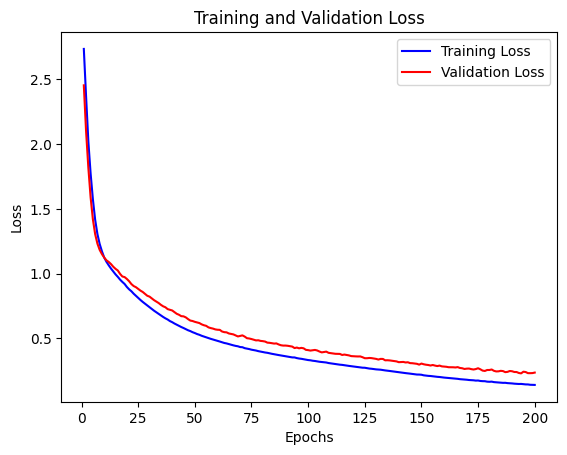

In [ ]:
# 훈련 및 검증 손실 그리기
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

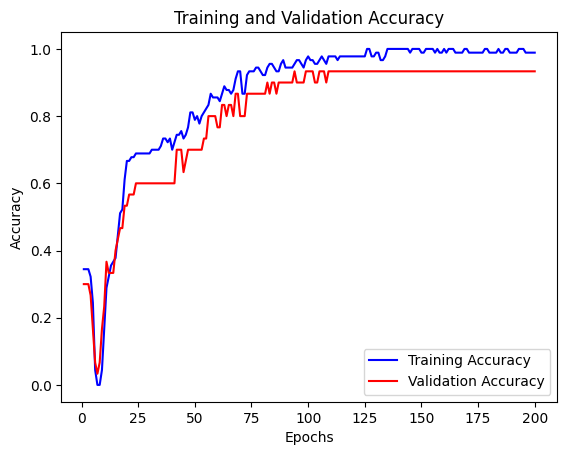

In [ ]:
# 훈련 및 검증 정확도 그리기
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

1/1 [==============================] - 0s 247ms/step - loss: 0.1810 - accuracy: 0.9667
Test accuracy: 0.9666666388511658
